Importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


Importing data set(downloaded from Kaggle)

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_sub = test.copy()
print(train.shape)
print(test.shape)

train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)
print(test_sub.head(2))
all_features = pd.concat([train, test]).reset_index(drop=True)
print(all_features.shape)
print(test_sub.shape)

(1460, 81)
(1459, 80)
     Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal

[2 rows x 80 columns]
(2919, 80)
(1459, 80)


getting the % of missing values

In [ ]:
features_with_na=[features for features in all_features.columns if all_features[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(all_features[feature].isnull().mean(), 4),  ' % missing values')

MSZoning 0.0014  % missing values
LotFrontage 0.1665  % missing values
Alley 0.9322  % missing values
Utilities 0.0007  % missing values
MasVnrType 0.0082  % missing values
MasVnrArea 0.0079  % missing values
BsmtQual 0.0277  % missing values
BsmtCond 0.0281  % missing values
BsmtExposure 0.0281  % missing values
BsmtFinType1 0.0271  % missing values
BsmtFinType2 0.0274  % missing values
BsmtFullBath 0.0007  % missing values
BsmtHalfBath 0.0007  % missing values
Functional 0.0007  % missing values
FireplaceQu 0.4865  % missing values
GarageType 0.0538  % missing values
GarageYrBlt 0.0545  % missing values
GarageFinish 0.0545  % missing values
GarageQual 0.0545  % missing values
GarageCond 0.0545  % missing values
PoolQC 0.9966  % missing values
Fence 0.8044  % missing values
MiscFeature 0.964  % missing values
SalePrice 0.4998  % missing values


missing values vs non- missing values effect on SalePrice

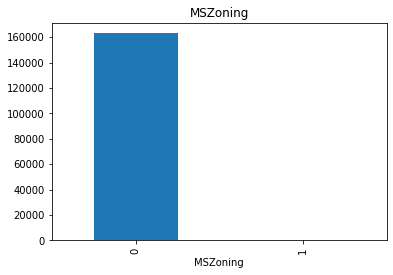

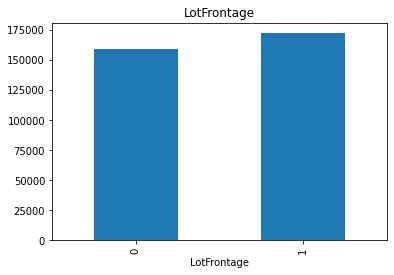

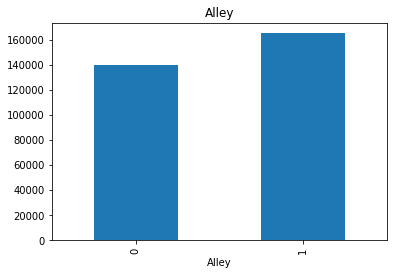

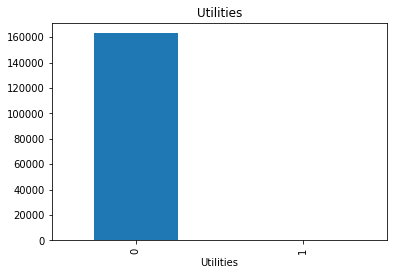

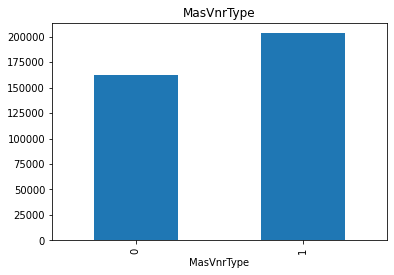

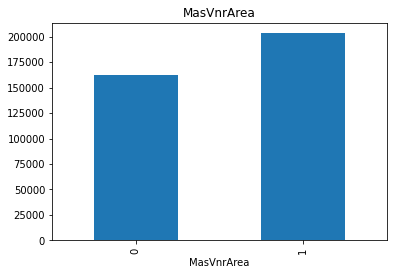

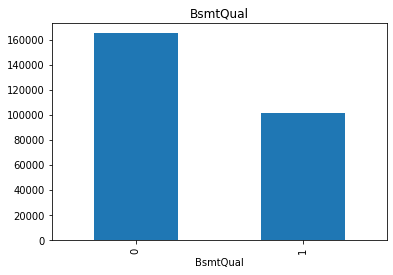

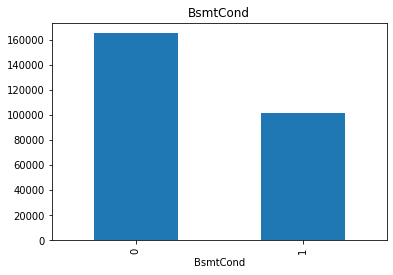

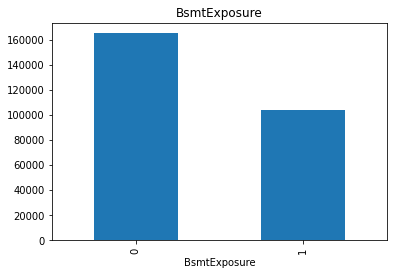

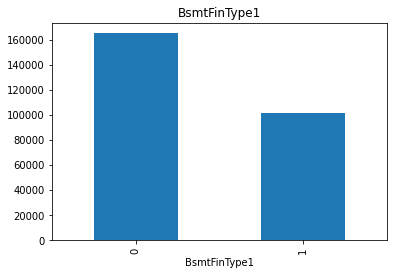

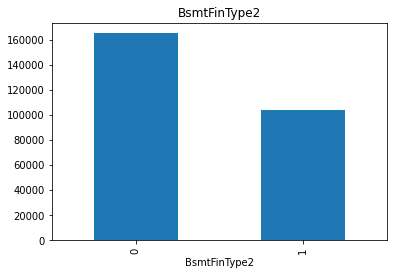

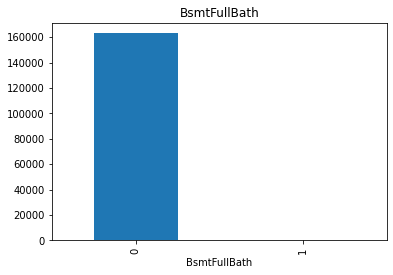

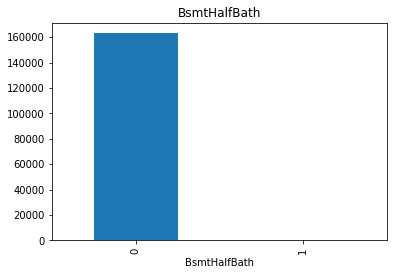

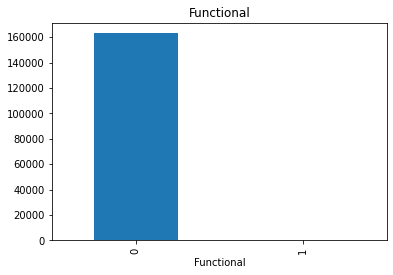

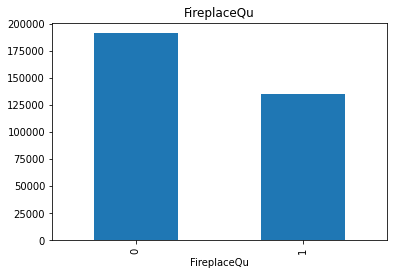

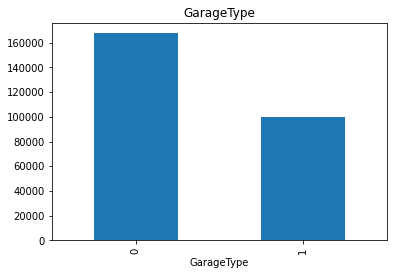

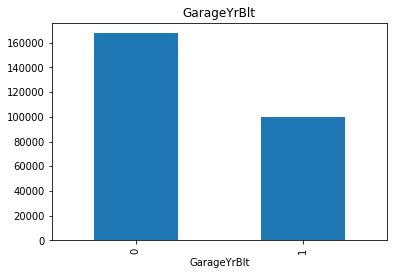

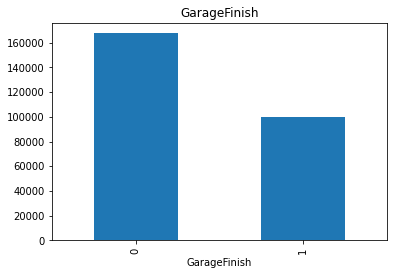

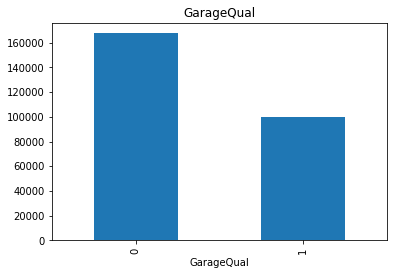

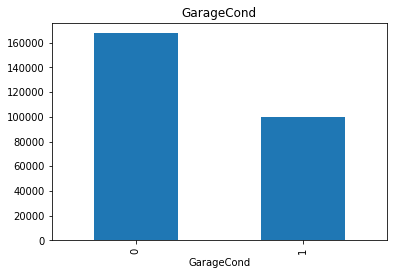

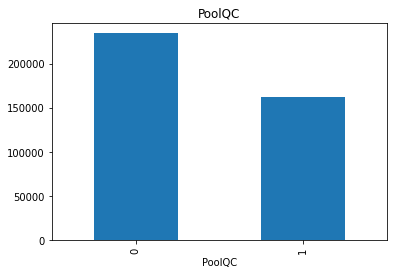

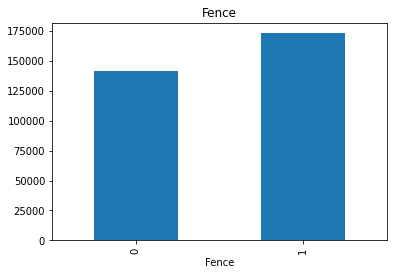

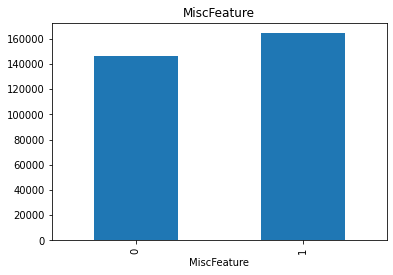

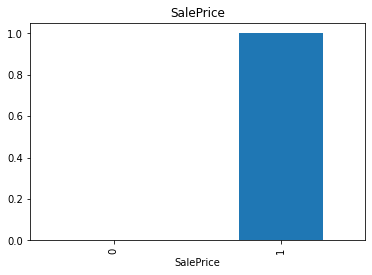

In [ ]:
all_features.drop('SalePrice',axis = 1)
for feature in features_with_na:
    data = all_features.copy()

    # 1 if the data point is missing and 0 if it's not
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()


Getting distribution of SalePrice

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180921.20 and sigma = 79415.29



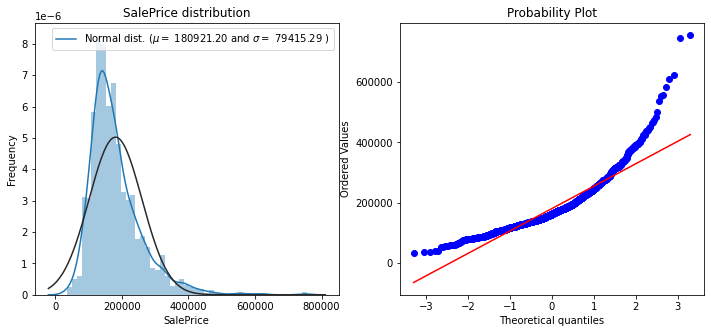

In [ ]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

def feature_distribution(data):
  fig = plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.distplot(data , fit=norm);
  # Get the fitted parameters used by the function
  (mu, sigma) = norm.fit(data)
  print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
              loc='best')
  plt.ylabel('Frequency')
  plt.title('SalePrice distribution')
  plt.subplot(1,2,2)
  res = stats.probplot(data, plot=plt)

feature_distribution(train['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.40



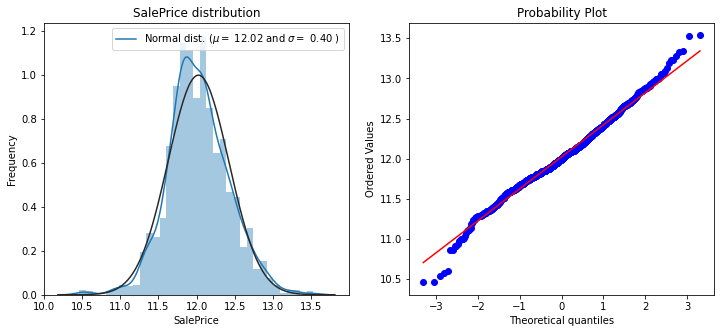

In [ ]:
train["SalePrice"] = np.log1p(train["SalePrice"])

feature_distribution(train['SalePrice'])

Checking distribution of different values in the object attributes

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


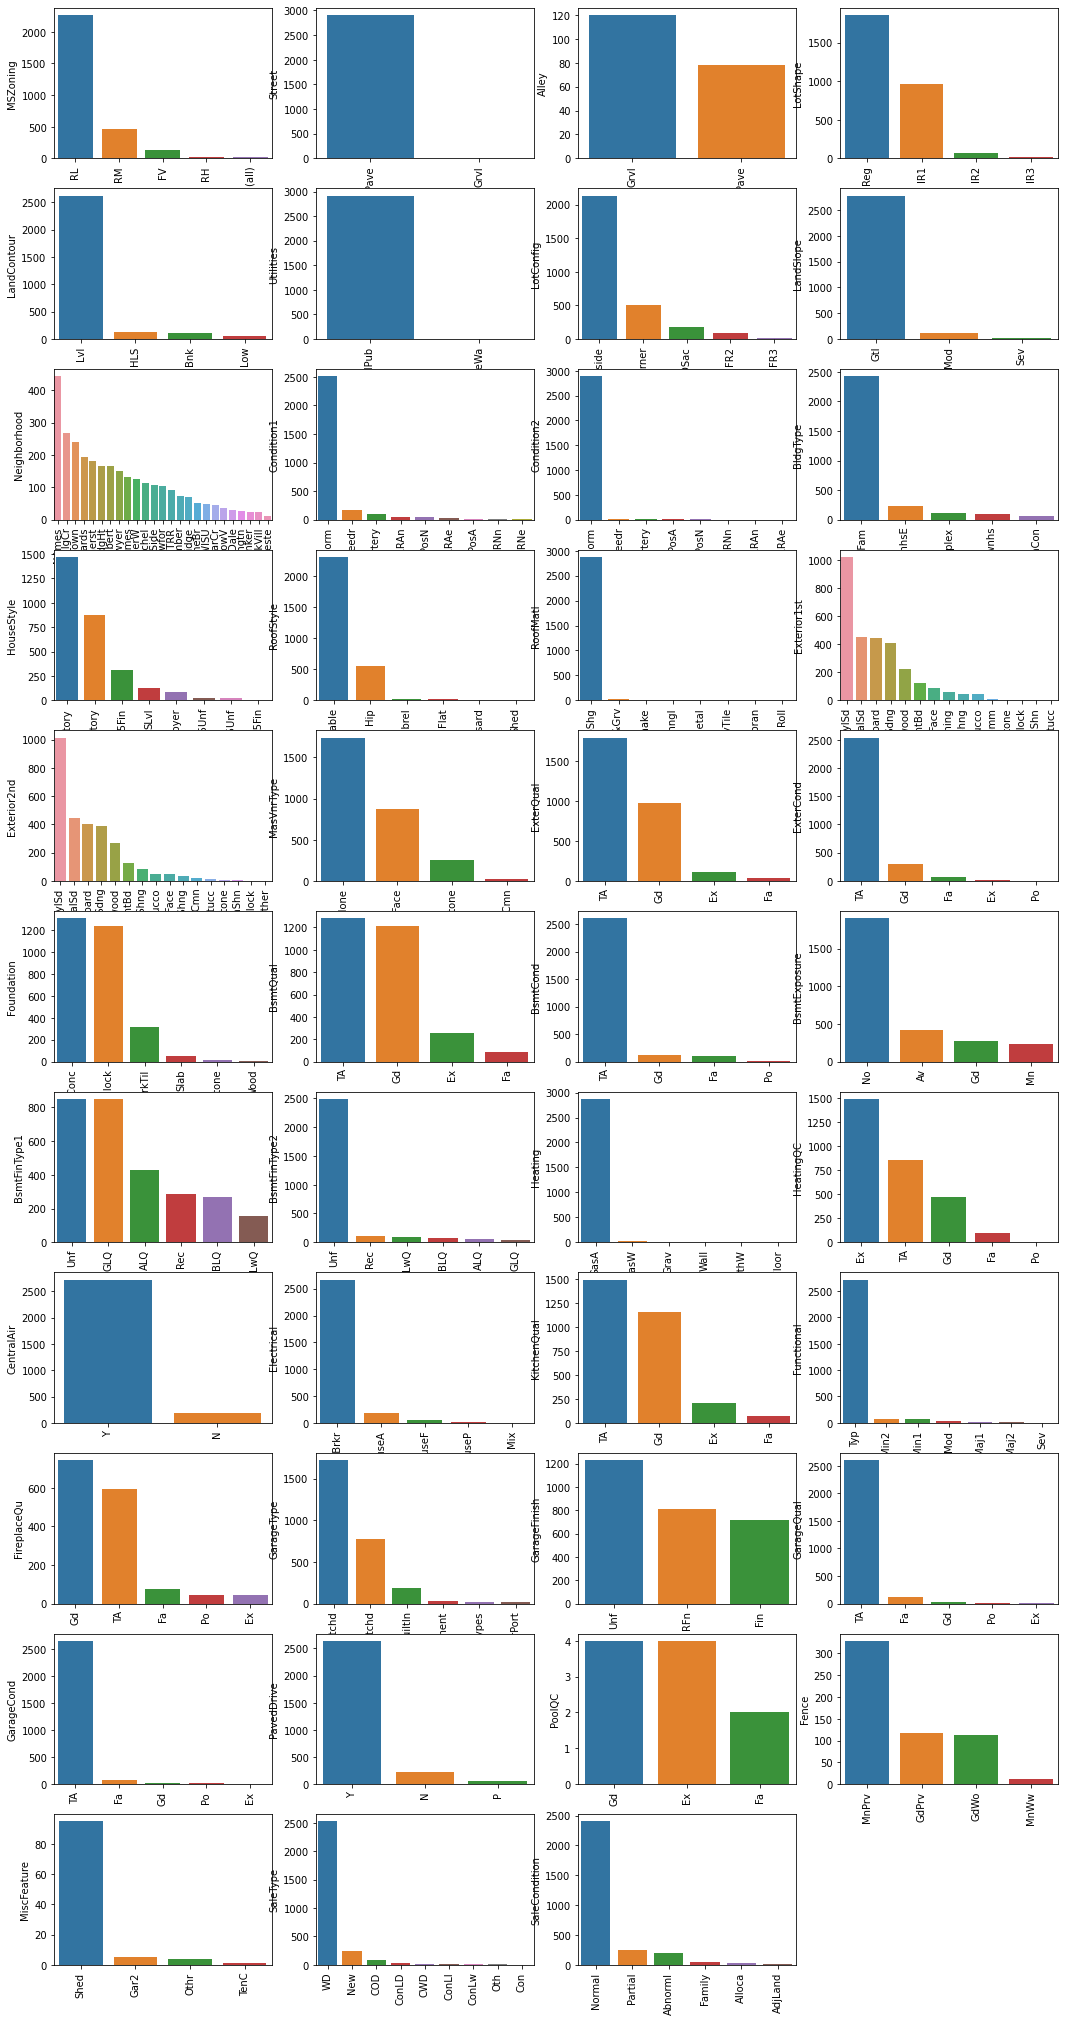

In [ ]:
s = (train.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
for col in object_cols:
  y = all_features[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

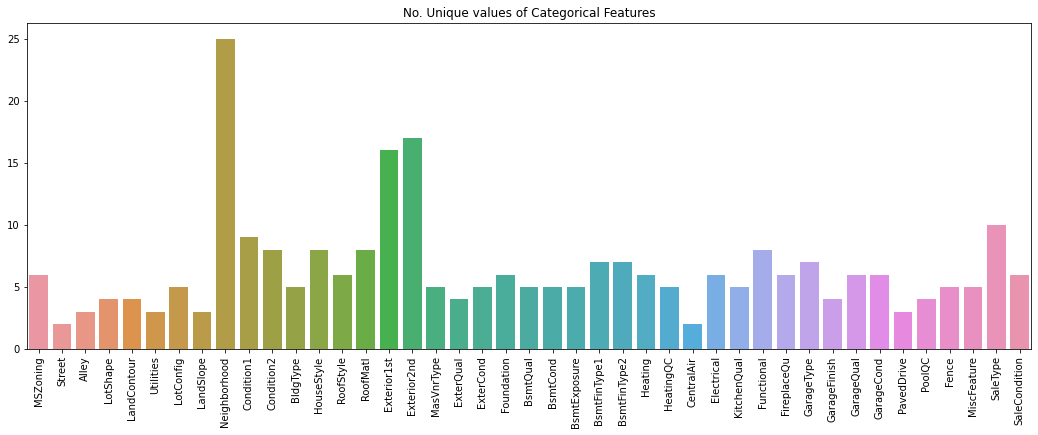

In [ ]:
unique_values = []
for col in object_cols:
  unique_values.append(all_features[col].unique().size)
plt.figure(figsize=(18,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

In [ ]:
train_labels = train['SalePrice'].reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

Getting numerical and non numerical feature

In [ ]:
# getting numerical and non numerical features form the dataset
def classify_numerical_feature(df):
    numerical = df.select_dtypes('number').columns
    non_numerical = df.select_dtypes(['category', 'object']).columns
    print('No. numerical_features = ' + str(len(numerical)))
    print('No. non_numerical_features = ' + str(len(non_numerical)))
    return numerical, non_numerical

numerical_features, non_numerical_features = classify_numerical_feature(all_features)  

all_features[numerical_features].head()
classify_numerical_feature(all_features)

No. numerical_features = 37
No. non_numerical_features = 43
No. numerical_features = 37
No. non_numerical_features = 43


(Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'H

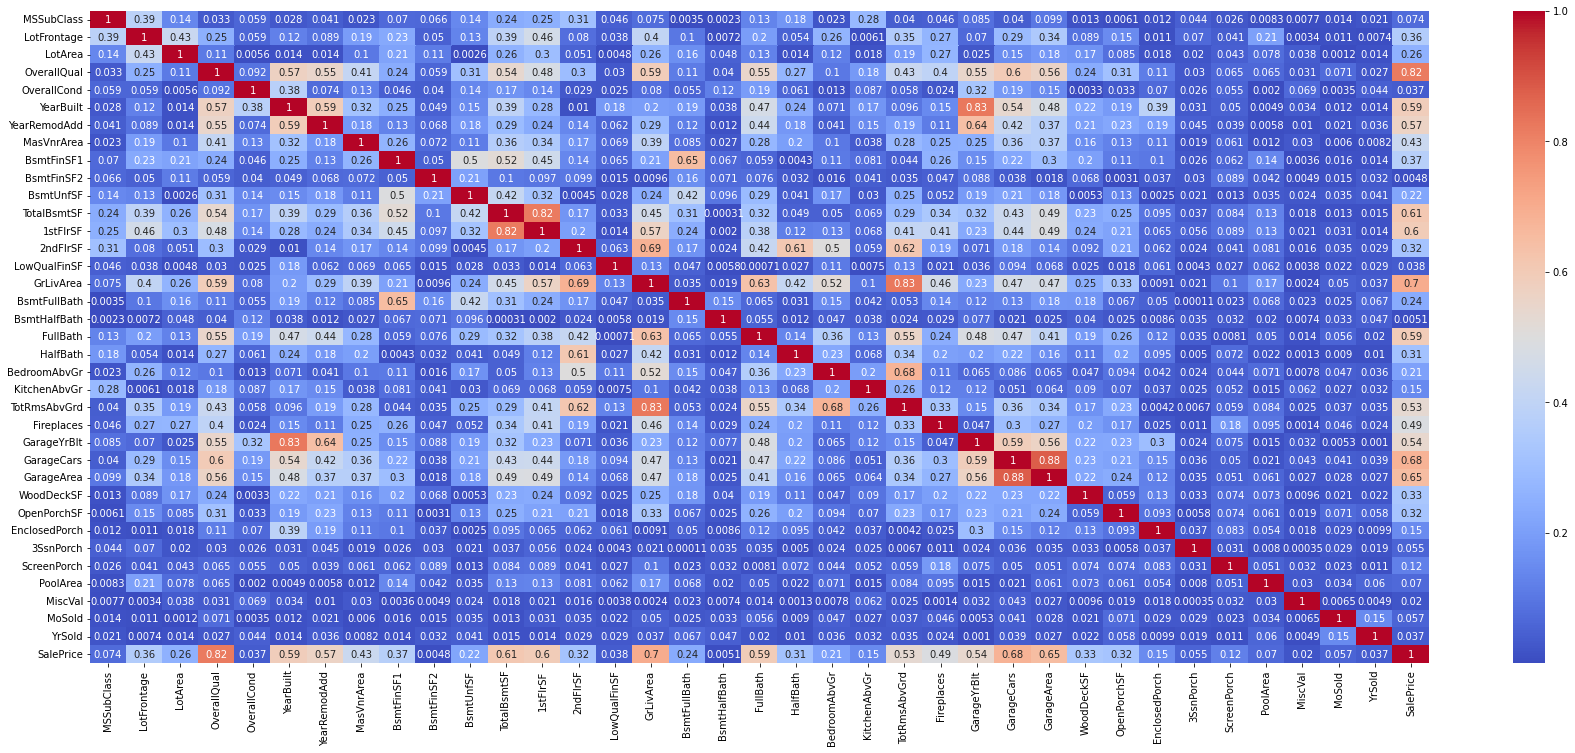

In [ ]:
# getting the correlation matrix from dataset
corr = np.abs(train.corr())
plt.figure(figsize=(30,12))
sns.heatmap(corr,cmap='coolwarm',annot = True)
plt.show()

Filtering higher correlated attributes

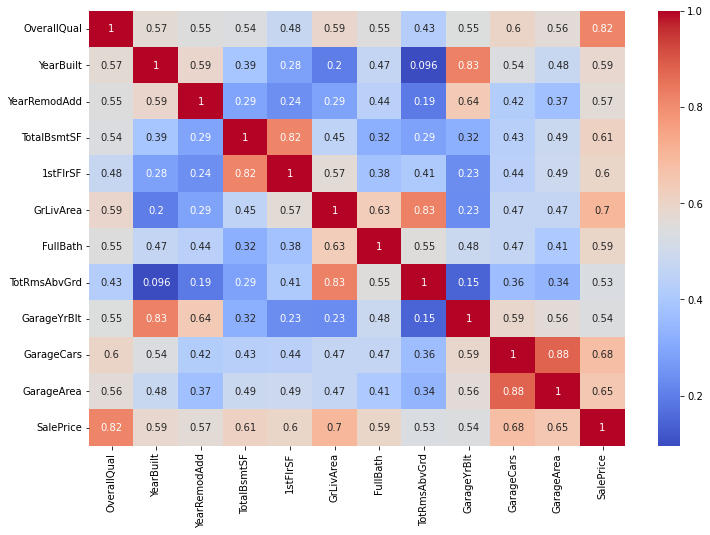

In [ ]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, cmap='coolwarm',annot=True)
plt.show()

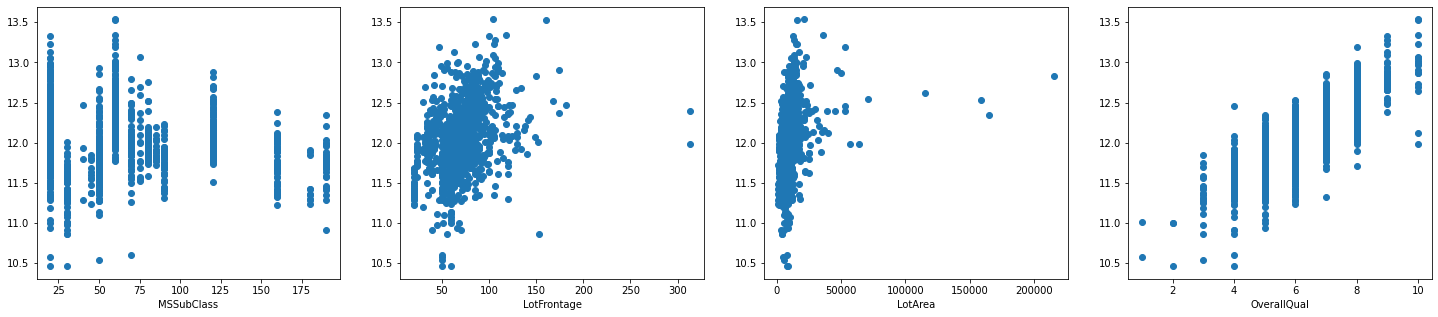

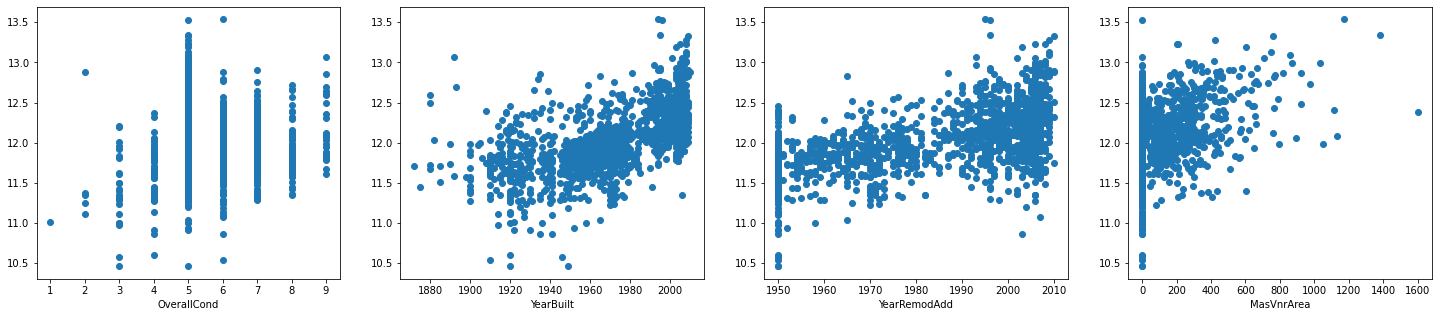

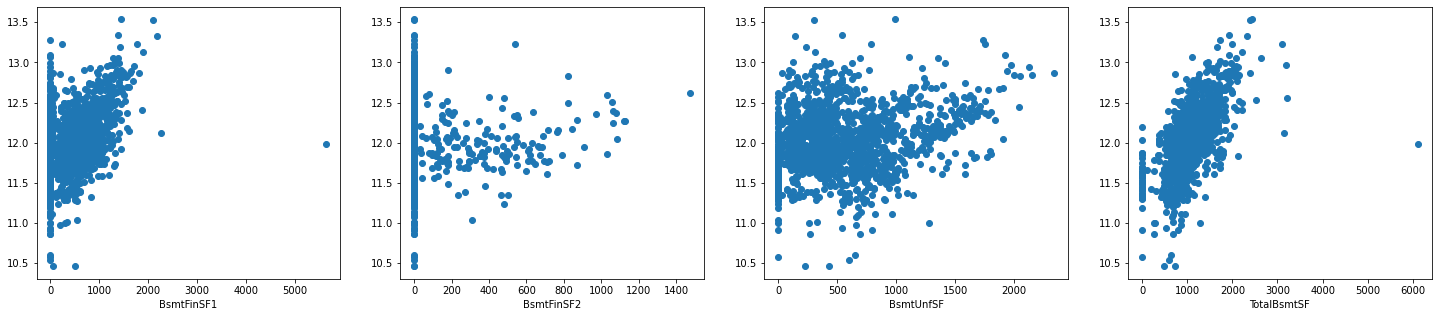

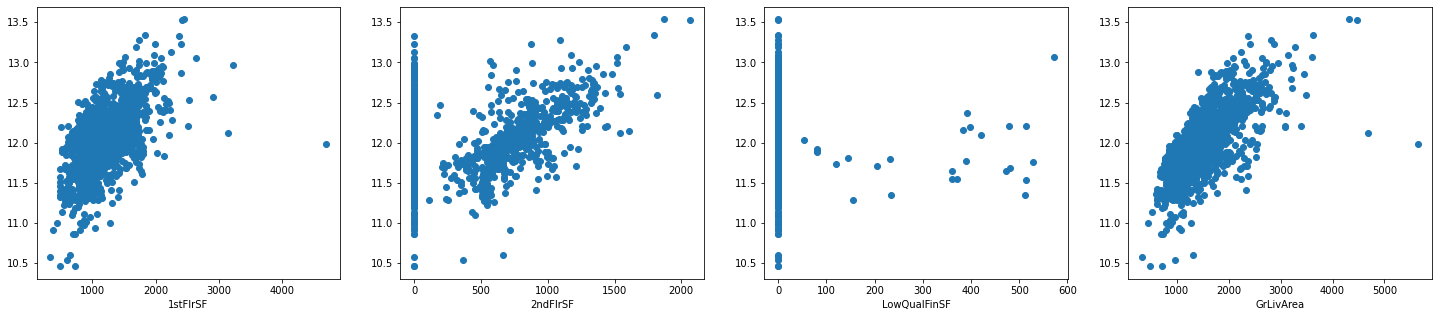

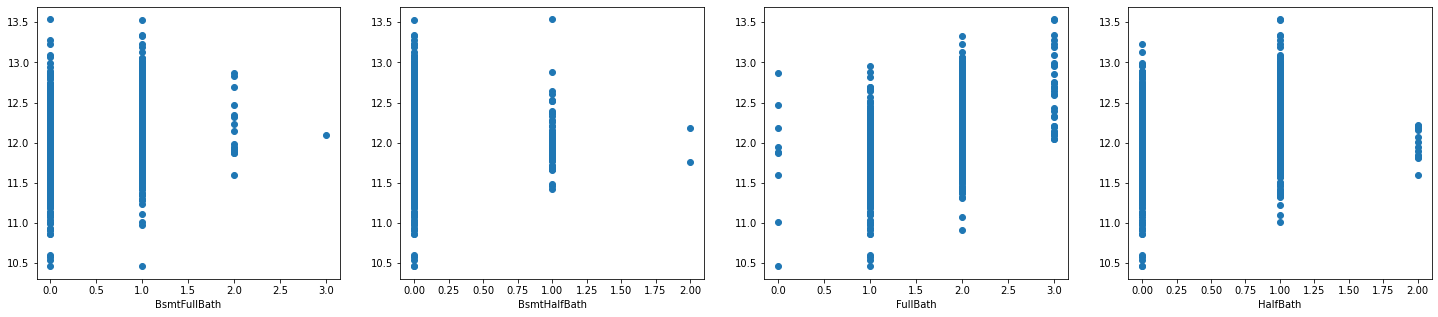

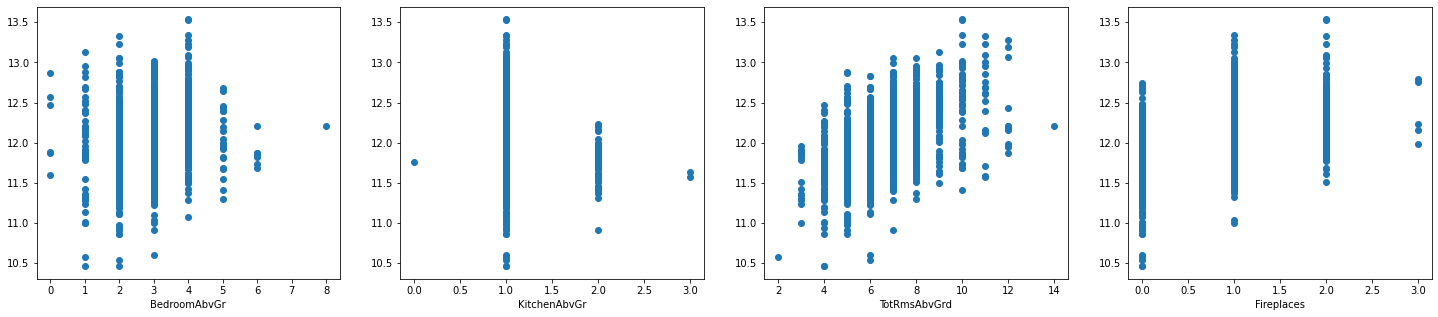

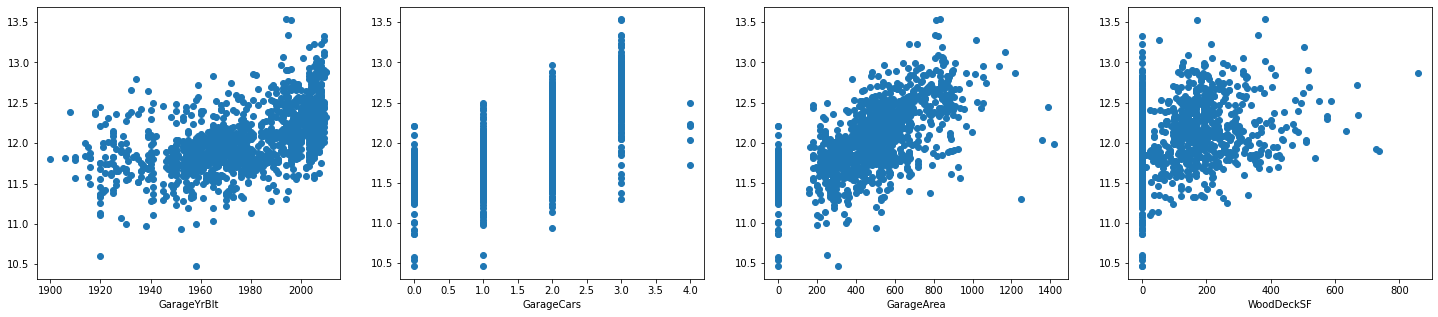

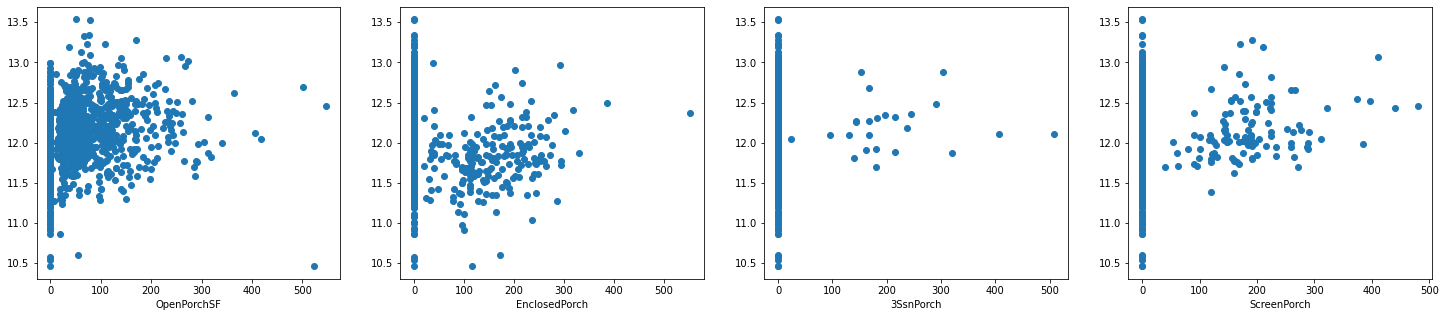

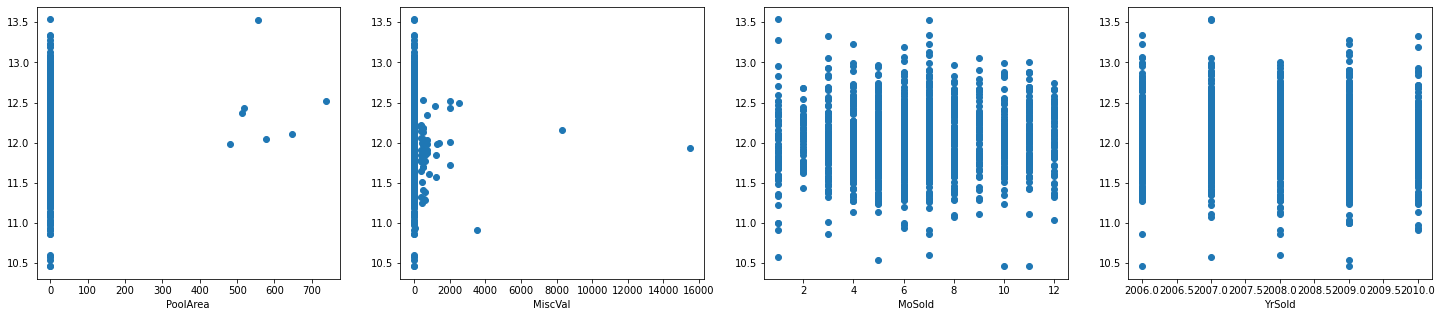

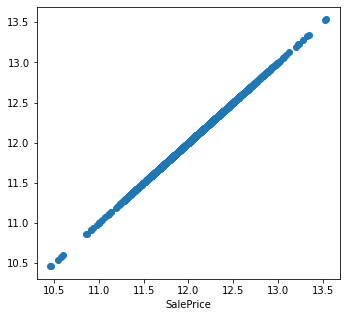

In [ ]:
def scatter_with_feature(df, features, feature_target, figures_per_time = 4):
  count = 0
  for feature in features:
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,figures_per_time)+1)
    plt.scatter(x= feature, y=feature_target, data = df)
    plt.xlabel(feature)
    count += 1

scatter_with_feature(train, numerical_features, 'SalePrice')

In [ ]:
print(all_features['Electrical'].isnull().any())
def clean_null(df):

    # Replace 'LotFrontage' base on Neighborhood
    df['LotFrontage'] = df.groupby('Neighborhood')["LotFrontage"].transform(
        lambda x: x.fillna(x.median()))

    # GarageYrBlt replacing with 0
    df['GarageYrBlt'].fillna(0, inplace=True)
    
    #MasVnrArea replacing with 0
    df['MasVnrArea'].fillna(0, inplace = True)

    df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
    
    numerical = df.select_dtypes('number').columns
    non_numerical = df.select_dtypes(['category', 'object']).columns
    
    # missing value in non_numerical_columns
    features_with_na = [x for x in df.columns if df[x].isnull().sum()>0]  
    non_numerical_features_na = [x for x in features_with_na if x in non_numerical]   
    # Missing data filling None
    df[non_numerical_features_na] = df[non_numerical_features_na].fillna('None')
    
    numerical_features_na = [x for x in features_with_na if x in numerical]   
    for x in numerical_features_na:
        df[x].fillna(0, inplace = True)
    
clean_null(all_features)
print(all_features['Electrical'].isnull().any())

True
False


Encoding the categorical features

In [ ]:
print(all_features['LotShape'])
def encode_categorical_feature(df):
    df['LotShape'].replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)
    df['BldgType'].replace({'1Fam':1, '2fmCon':1, 'Duplex':3, 'TwnhsE':4, 'Twnhs':5}, inplace=True)
    df['LandContour'].replace({ 'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)
    df['Utilities'].replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)
    df['LandSlope'].replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)
    df['ExterQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    df['ExterCond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    df['BsmtQual'].replace({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    df['BsmtCond'].replace({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    df['BsmtExposure'].replace({'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)
    df['BsmtFinType1'].replace({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
    df['BsmtFinType2'].replace({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
    df['HeatingQC'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    df['KitchenQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    df['Functional'].replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)
    df['FireplaceQu'].replace({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    df['GarageFinish'].replace({'None':0, 'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)
    df['GarageQual'].replace({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    df['GarageCond'].replace({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    df['PoolQC'].replace({'None':0, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    df['PavedDrive'].replace({'N':1, 'P':2, 'Y':3}, inplace=True)

    df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    df['HasBasement'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

encode_categorical_feature(all_features)
print(all_features['LotShape'])

0       Reg
1       Reg
2       IR1
3       IR1
4       IR1
       ... 
2914    Reg
2915    Reg
2916    Reg
2917    Reg
2918    Reg
Name: LotShape, Length: 2919, dtype: object
0       1
1       1
2       2
3       2
4       2
       ..
2914    1
2915    1
2916    1
2917    1
2918    1
Name: LotShape, Length: 2919, dtype: int64


In [ ]:
def features_null(df):
    features_with_na = [x for x in df.columns if df[x].isnull().sum()>0]
    print('No. features_with_na = ' + str(len(features_with_na)))
    print('Total NaN = ' + str(df.isnull().values.sum()))

    total_miss = df[features_with_na].isnull().sum()
    percent_miss = total_miss*100/len(df)
    features_with_na_df = pd.DataFrame({'Total': total_miss,
                                  '%': percent_miss})
    features_with_na_df = features_with_na_df.sort_values('%',ascending=False)
    return features_with_na_df

features_null(all_features)
print(all_features.head(5))

No. features_with_na = 0
Total NaN = 0
   MSSubClass MSZoning  LotFrontage  ...  SalePrice HasGarage HasBasement
0          60       RL         65.0  ...   208500.0         1           1
1          20       RL         80.0  ...   181500.0         1           1
2          60       RL         68.0  ...   223500.0         1           1
3          70       RL         60.0  ...   140000.0         1           1
4          60       RL         84.0  ...   250000.0         1           1

[5 rows x 82 columns]


In [ ]:
all_features['BsmtFinType1_Unf'] = 1*(all_features['BsmtFinType1'] == 'Unf')
all_features['HasWoodDeck'] = (all_features['WoodDeckSF'] == 0) * 1
all_features['HasOpenPorch'] = (all_features['OpenPorchSF'] == 0) * 1
all_features['HasEnclosedPorch'] = (all_features['EnclosedPorch'] == 0) * 1
all_features['Has3SsnPorch'] = (all_features['3SsnPorch'] == 0) * 1
all_features['HasScreenPorch'] = (all_features['ScreenPorch'] == 0) * 1
all_features['YearsSinceRemodel'] = all_features['YrSold'].astype(int) - all_features['YearRemodAdd'].astype(int)
all_features['Total_Home_Quality'] = all_features['OverallQual'] + all_features['OverallCond']
all_features = all_features.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
all_features['TotalSF'] = all_features['TotalBsmtSF'] + all_features['1stFlrSF'] + all_features['2ndFlrSF']
all_features['YrBltAndRemod'] = all_features['YearBuilt'] + all_features['YearRemodAdd']

all_features['Total_sqr_footage'] = (all_features['BsmtFinSF1'] + all_features['BsmtFinSF2'] +
                                 all_features['1stFlrSF'] + all_features['2ndFlrSF'])
all_features['Total_Bathrooms'] = (all_features['FullBath'] + (0.5 * all_features['HalfBath']) +
                               all_features['BsmtFullBath'] + (0.5 * all_features['BsmtHalfBath']))
all_features['Total_porch_sf'] = (all_features['OpenPorchSF'] + all_features['3SsnPorch'] +
                              all_features['EnclosedPorch'] + all_features['ScreenPorch'] +
                              all_features['WoodDeckSF'])
all_features['TotalBsmtSF'] = all_features['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
all_features['2ndFlrSF'] = all_features['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
all_features['GarageArea'] = all_features['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
all_features['GarageCars'] = all_features['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
all_features['LotFrontage'] = all_features['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
all_features['MasVnrArea'] = all_features['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
all_features['BsmtFinSF1'] = all_features['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)

all_features['haspool'] = all_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_features['has2ndfloor'] = all_features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasgarage'] = all_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasbsmt'] = all_features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasfireplace'] = all_features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
all_features.shape

(2919, 97)

Feature scaling for the attributes

In [ ]:
print(all_features.shape)
def logs(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
        res.columns.values[m] = l + '_log'
        m += 1
    return res

log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','TotalSF']

all_features = logs(all_features, log_features)
print(all_features.head())

(2919, 97)
   MSSubClass MSZoning  LotFrontage  ...  MiscVal_log YearRemodAdd_log  TotalSF_log
0          60       RL         65.0  ...      0.00995         7.602905     7.850497
1          20       RL         80.0  ...      0.00995         7.589341     7.834000
2          60       RL         68.0  ...      0.00995         7.602406     7.903600
3          70       RL         60.0  ...      0.00995         7.586301     7.813596
4          60       RL         84.0  ...      0.00995         7.601407     8.114926

[5 rows x 127 columns]


In [ ]:
print(all_features.shape)
def squares(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(res[l]*res[l]).values)   
        res.columns.values[m] = l + '_sq'
        m += 1
    return res 

squared_features = ['YearRemodAdd', 'LotFrontage_log', 
              'TotalBsmtSF_log', '1stFlrSF_log', '2ndFlrSF_log', 'GrLivArea_log',
              'GarageCars_log', 'GarageArea_log']
all_features = squares(all_features, squared_features)
all_features.shape

(2919, 127)


(2919, 135)

In [ ]:
print(type(all_features))
all_features = pd.get_dummies(all_features).reset_index(drop=True)

print('Final data shape:', all_features.shape)
print(type(all_features))
all_features.head()

<class 'pandas.core.frame.DataFrame'>
Final data shape: (2919, 292)
<class 'pandas.core.frame.DataFrame'>


,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,...,Functional_3,Functional_4,Functional_5,Functional_6,Functional_7,Functional_8,Functional_None,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,1,4,3,1,7,5,2003,2003,196.00000,4,3,4,3,1,6,706.0,1,0.0,150.0,856.0,5,856,854.000000,0,1710,1.0,0.0,2,1,3,1,8,0,0,2003.0,2,2.0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,1,4,3,1,6,8,1976,1976,54.59815,3,3,4,3,4,5,978.0,1,0.0,284.0,1262.0,5,1262,665.141633,0,1262,0.0,1.0,2,0,3,1,6,1,3,1976.0,2,2.0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,2,4,3,1,7,5,2001,2002,162.00000,4,3,4,3,2,6,486.0,1,0.0,434.0,920.0,5,920,866.000000,0,1786,1.0,0.0,2,1,3,1,6,1,3,2001.0,2,2.0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,2,4,3,1,7,5,1915,1970,54.59815,3,3,3,4,1,5,216.0,1,0.0,540.0,756.0,4,961,756.000000,0,1717,1.0,0.0,1,0,3,1,7,1,4,1998.0,1,3.0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,2,4,3,1,8,5,2000,2000,350.00000,4,3,4,3,3,6,655.0,1,0.0,490.0,1145.0,5,1145,1053.000000,0,2198,1.0,0.0,2,1,4,1,9,1,3,2000.0,2,3.0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
X = all_features.iloc[:len(train_labels), :]
y = train_labels
test = all_features.iloc[len(train_labels):, :]
X.shape, y.shape, test.shape

((1460, 292), (1460,), (1459, 292))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print('Shape')
print('X_train: ' + str(X_train.shape))
print('X_test: ' + str(X_test.shape))
print('y_train: ' + str(y_train.shape))
print('y_test: ' + str(y_test.shape))

Shape
X_train: (1022, 292)
X_test: (438, 292)
y_train: (1022,)
y_test: (438,)


In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn import linear_model
lr = linear_model.LinearRegression()

#Fit the model
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#Score/Accuracy
print("Accuracy --> ", lr.score(X_test, y_test)*100)

Accuracy -->  94.27344280514936


In [ ]:
def plot_test_predict(test, predict):
  plt.figure(figsize=(10,10))
  plt.scatter(test, predict, c='blue')
  plt.yscale('log')
  plt.xscale('log')

  p1 = max(max(predict), max(test))
  p2 = min(min(predict), min(test))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.xlabel('True Values', fontsize=15)
  plt.ylabel('Predictions', fontsize=15)
  plt.axis('equal')
  plt.show()

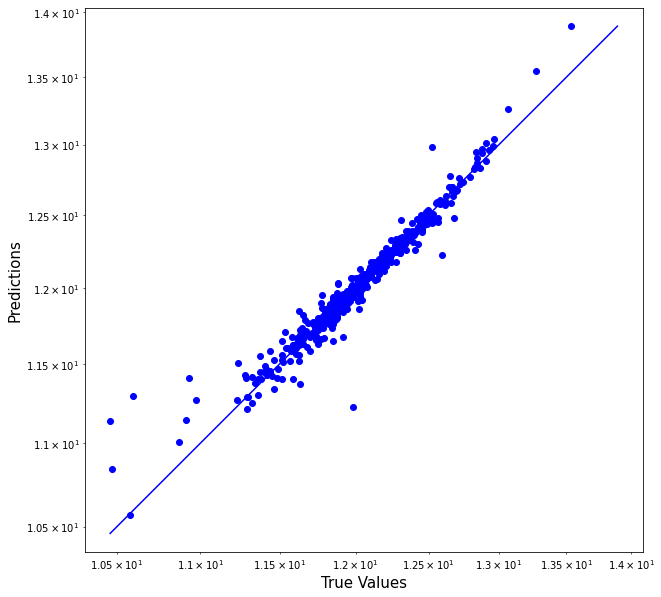

In [ ]:
plot_test_predict(y_test, y_pred_lr)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=250, max_depth=3)

#Fit
GBR.fit(X_train, y_train)
y_pred_GBR = GBR.predict(X_test)
print("Accuracy --> ", GBR.score(X_test, y_test)*100)
print(mean_absolute_error(y_test, y_pred_GBR))

Accuracy -->  99.90404128692505
0.004340851070228216


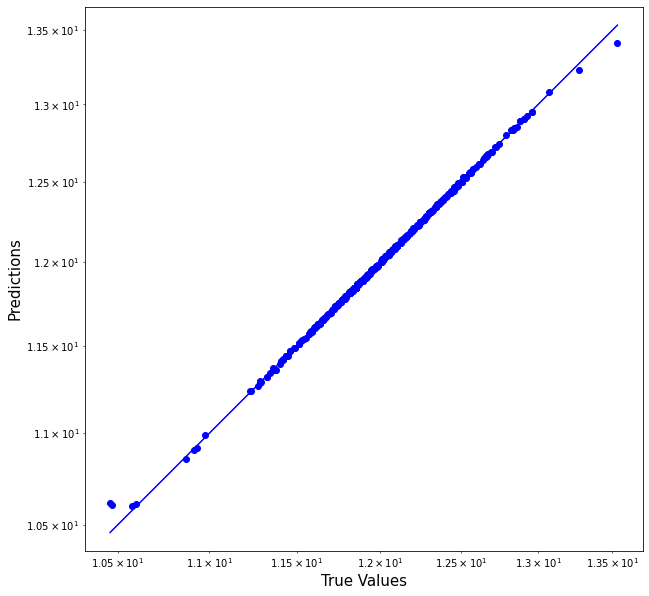

In [ ]:
plot_test_predict(y_test, y_pred_GBR)

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


model_XGBR = XGBRegressor(learning_rate=0.03,n_estimators=200,objective='reg:squarederror')
model_XGBR.fit(X_train,y_train)
Y_pred = model_XGBR.predict(X_test)
print(mean_absolute_error(y_test, Y_pred))
print("Accuracy --> ", model_XGBR.score(X_test, y_test)*100)
print("R-squad is -->",r2_score(y_test,Y_pred)*100)
adjusted_R = 1 - ( 1-model_XGBR.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 )
print('adjusted R squad -- >',adjusted_R*100)

0.02751624719754062
Accuracy -->  99.41297858366354
R-squad is --> 99.41297858366354
adjusted R squad -- > 98.23083890386876


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, y_train)
Y_pred = model_RFR.predict(X_test)
print(mean_absolute_error(y_test, Y_pred))
print("Accuracy --> ", model_RFR.score(X_test, y_test)*100)
print("R-squad is -->",r2_score(y_test,Y_pred)*100)

0.006120456771579634
Accuracy -->  99.03057453642946
R-squad is --> 99.03057453642946


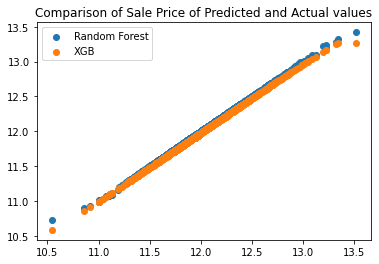

In [ ]:
plt.figure()
plt.title('Comparison of Sale Price of Predicted and Actual values')
plt.scatter(y_train,model_RFR.predict(X_train),label='Random Forest')
plt.scatter(y_train,model_XGBR.predict(X_train),label='XGB')
plt.legend()

In [ ]:
from sklearn.linear_model import SGDRegressor

model_SGD = SGDRegressor()
model_SGD.fit(X_train, y_train)
Y_pred = model_SGD.predict(X_test)
print(mean_absolute_error(y_test, Y_pred))
print("Accuracy --> ", model_SGD.score(X_test, y_test)*100)
print("R-squad is -->",r2_score(y_test,Y_pred)*100)

2.487712354919707e+21
Accuracy -->  -3.6933907606586525e+45
R-squad is --> -3.6933907606586525e+45


In [ ]:
from sklearn.model_selection import GridSearchCV
model = XGBRegressor()

n_estimators   = [100, 200, 500]
learning_rates = [0.03,0.1,0.3]
objectives     = ['reg:squarederror']

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'learning_rate':learning_rates,
    'objective' : objectives
    }

grid_cv = GridSearchCV(estimator = model,
            param_grid = hyperparameter_grid,
            scoring = 'neg_mean_absolute_error',
            return_train_score = True)

grid_cv.fit(X_train,y_train)

GridSearchCV(estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.03, 0.1, 0.3],
                         'n_estimators': [100, 200, 500],
                         'objective': ['reg:squarederror']},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [ ]:
print(grid_cv.best_estimator_)
grid_cv.best_score_

XGBRegressor(learning_rate=0.03, n_estimators=500, objective='reg:squarederror')


-0.0037796780613696206

In [ ]:
regressor = grid_cv.best_estimator_
Y_pred = regressor.predict(X_test)
print(mean_absolute_error(y_test, Y_pred))

0.003751566392935712
